In [86]:
# !pip install py-elvis
# !pip install pyyaml==5.4
# !pip install networkx
# !pip install scipy
# !pip install scikit-learn
# !pip install pandas

In [87]:
# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [88]:
import pandas as pd
import numpy as np
import datetime
import random
import yaml

In [89]:
from elvis.config import ScenarioConfig, ScenarioRealisation
from elvis.simulate import simulate
from elvis.utility.elvis_general import create_time_steps
from elvis.set_up_infrastructure import wallbox_infrastructure

In [90]:
from google.colab import drive
drive.mount('/content/drive')
#input_folder = 'data/config_builder/'
input_folder = 'drive/My Drive/DAI-Labor/Thesis/data/config_builder/'
output_folder = 'drive/My Drive/DAI-Labor/Thesis/data/elvis_output_data_0/'
#tst = os.listdir(input_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Choose one test case and comment out all others

In [91]:
# case = 'customer_parking_night.yaml'
# case = 'customer_parking_day.yaml'

# case = 'office.yaml'
# case = 'office_fleet.yaml'

#case = 'residential.yaml'
#case = 'wohnblock.yaml'
#case = 'wohnblock_2.yaml'
case = 'wohnblock_2_household.yaml'

# case = 'gasstation_speedway.yaml'
# case = 'tankstelle_city.yaml'

# case = 'cabstand.yaml'
# case = 'roadside.yaml'
# case = 'PnR.yaml'

with open(input_folder + case, 'r') as file:
    yaml_str = yaml.full_load(file)

config = ScenarioConfig.from_yaml(yaml_str)

Config settings

In [92]:
print(config)

Vehicle types: <generator object ScenarioConfig.__str__.<locals>.<genexpr> at 0x7f31fd9cf4d0>Mean parking time: 17
Std deviation of parking time: 2.5
Mean value of the SOC distribution: 0.6
Std deviation of the SOC distribution: 0.1
Max parking time: 24
Number of charging events per week: 18
Vehicles are disconnected only depending on their parking time
Queue length: 0
Opening hours: None
Scheduling policy: Uncontrolled



In [93]:
start_date = '2017-06-01T00:00:00'
end_date = '2017-07-01T00:00:00'
resolution = '0:15:00'
realisation = config.create_realisation(start_date, end_date, resolution)
result = simulate(realisation)

Progress: 0.0 %
Progress: 5.0 %
Progress: 10.0 %
Progress: 15.0 %
Progress: 20.0 %
Progress: 25.0 %
Progress: 30.0 %
Progress: 35.0 %
Progress: 40.0 %
Progress: 45.0 %
Progress: 50.0 %
Progress: 55.0 %
Progress: 60.0 %
Progress: 65.0 %
Progress: 70.0 %
Progress: 75.0 %
Progress: 80.0 %
Progress: 85.0 %
Progress: 90.0 %
Progress: 95.0 %


#### Load profile
No preload considered.

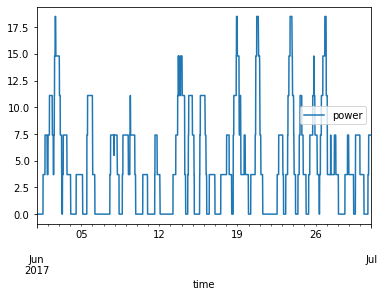

In [94]:
import pandas as pd
from elvis.utility.elvis_general import num_time_steps

start = realisation.start_date
end = realisation.end_date
res = realisation.resolution
load_profile = result.aggregate_load_profile(num_time_steps(start, end, res))
EV_load_dataframe = pd.DataFrame(zip(create_time_steps(start, end, res), load_profile))

EV_load_dataframe.rename(columns={0: 'time', 1: 'power'}, inplace=True) #kW
EV_load_dataframe.set_index('time', inplace=True)

EV_load_dataframe.plot()

In [95]:
EV_load_profile_csv = EV_load_dataframe.to_csv((output_folder+'EV_load.csv'), index = True)
#EV_load_profile_csv = EV_load_dataframe.to_csv('output_data_0/EV_load.csv', index = True)

#Charging events generator

In [96]:
#print(realisation.charging_events)
#charging_events = result.create_charging_events(num_time_steps(start, end, res))
#EV_load_dataframe = pd.DataFrame(zip(create_time_steps(start, end, res), load_profile))

# charging_events = realisation.charging_events
# j=1
# for charging_event in charging_events:
#     #print( type(charging_event.id), charging_event.id)
#     charging_event.id = 'Charging event: ' + str(j)
#     print( charging_event, '\n')
#     j += 1

for j in range(len(realisation.charging_events)):
    #print( type(charging_event.id), charging_event.id)
    realisation.charging_events[j].id = 'Charging event: ' + str(j+1)
    print(realisation.charging_events[j], '\n')

charging_events = realisation.charging_events


Charging event: 1, Arrival time: 2017-06-01 14:00:00, Parking_time: 16.37553321273316, Leaving_time: 2017-06-02 06:22:31.919566, SOC: 0.6729294023201038, SOC target: 1.0, Connected car: Tesla, Model S 

Charging event: 2, Arrival time: 2017-06-01 18:15:00, Parking_time: 16.77281233561328, Leaving_time: 2017-06-02 11:01:22.124408, SOC: 0.42564924934408377, SOC target: 1.0, Connected car: Tesla, Model S 

Charging event: 3, Arrival time: 2017-06-02 00:45:00, Parking_time: 11.156746097956363, Leaving_time: 2017-06-02 11:54:24.285953, SOC: 0.41688916776755247, SOC target: 1.0, Connected car: Tesla, Model S 

Charging event: 4, Arrival time: 2017-06-02 03:45:00, Parking_time: 16.34941264239859, Leaving_time: 2017-06-02 20:05:57.885513, SOC: 0.4969466393455998, SOC target: 1.0, Connected car: Tesla, Model S 

Charging event: 5, Arrival time: 2017-06-02 13:15:00, Parking_time: 16.440772046606572, Leaving_time: 2017-06-03 05:41:26.779368, SOC: 0.5588103081419491, SOC target: 1.0, Connected car

In [97]:
import json

import math

time_serie = create_time_steps(start, end, res)
energy_resources = []
for i in range(len(time_serie)):
    #energy_resources.append([{"vehicle_id":0, "energy":0}])
    energy_resources.append([])

Avail_energy_df = pd.DataFrame({'time':time_serie, "Available_energy_sources" : energy_resources})
Avail_energy_df['time'] = pd.to_datetime(Avail_energy_df['time'])

Avail_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      2881 non-null   datetime64[ns]
 1   Available_energy_sources  2881 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 45.1+ KB


In [98]:
charging_power = 3.7 #kW
#soc_rate = 0.005 #battery%/minute

counter = 0


for charging_event in charging_events:
    #charging_event = (charging_event.to_json())
    charging_event = ({'id':(charging_event.id), 'Arrival_time':(charging_event.arrival_time),'Parking_time':(charging_event.parking_time), 'Leaving_time':(charging_event.leaving_time), 'SOC':(charging_event.soc), 'SOC_target':(charging_event.soc_target),'Connected_car':(charging_event.vehicle_type)})

    arrival_time_i = charging_event['Arrival_time']
    hours_parking_time = float(charging_event['Parking_time'])
    parking_time_i = math.modf(hours_parking_time)[1]*60 + (math.modf(math.modf(hours_parking_time)[0]*60)[1]-(math.modf(math.modf(hours_parking_time)[0]*60)[1]%5))
    leaving_time_i = charging_event['Leaving_time']

    #Avail_energy_serie_i = []

    vehicle_id = int(charging_event['id'][16:])
    
    vehicle_i = charging_event['Connected_car'].to_dict()
    soc_i = charging_event['SOC']
    battery_i = vehicle_i['battery']
    efficiency_i  = battery_i['efficiency']
    capacity_i  = battery_i['capacity'] #kWh
    energy_i = soc_i * capacity_i #kWh
    
    for j in range(len(time_serie)):
      counter += 1
      if time_serie[j] >= arrival_time_i and time_serie[j] <= leaving_time_i:
        charging_time = time_serie[j] - arrival_time_i
        energy_eval = energy_i + ((charging_time.total_seconds()/3600) * charging_power)* efficiency_i#kWh
        if energy_eval >= capacity_i:
          energy_eval = capacity_i
        #Avail_energy_serie_i.append({vehicle_id:energy_eval})
        Avail_energy_x = Avail_energy_df.Available_energy_sources[j]
        Avail_energy_x.append({"vehicle_id":vehicle_id, "energy":energy_eval})
        #Avail_energy_df['Available_energy_sources'][j] = Avail_energy_x
        Avail_energy_df.iat[j,1] = Avail_energy_x

  
print("made iterations: ", counter)
Avail_energy_df.head()

made iterations:  224718


,time,Available_energy_sources
0,2017-06-01 00:00:00,[]
1,2017-06-01 00:15:00,[]
2,2017-06-01 00:30:00,[]
3,2017-06-01 00:45:00,[]
4,2017-06-01 01:00:00,[]


In [99]:
Avail_energy_df.tail()

,time,Available_energy_sources
2876,2017-06-30 23:00:00,"[{'vehicle_id': 77, 'energy': 88.9139350943296..."
2877,2017-06-30 23:15:00,"[{'vehicle_id': 77, 'energy': 89.8389350943296..."
2878,2017-06-30 23:30:00,"[{'vehicle_id': 77, 'energy': 90.7639350943296..."
2879,2017-06-30 23:45:00,"[{'vehicle_id': 77, 'energy': 91.6889350943296..."
2880,2017-07-01 00:00:00,"[{'vehicle_id': 77, 'energy': 92.6139350943296..."


In [100]:
Avail_energy_csv = Avail_energy_df.to_csv((output_folder+'Avail_energy_sources.csv'), index = True)

Transforming CSV file in table for plotting

In [101]:
Avail_energy_csv_data = pd.read_csv((output_folder+'Avail_energy_sources.csv'))
Avail_energy_csv_data = Avail_energy_csv_data.iloc[:,1:]
Avail_energy_csv_data['time'] = pd.to_datetime(Avail_energy_csv_data['time'])

import ast


energy_init = []
for j in range(len(time_serie)):
    energy_init.append(0.00)


for j in range(len(time_serie)):
    timestep_x = Avail_energy_csv_data.Available_energy_sources[j]
    if type(timestep_x) == str:
        timestep_x = ast.literal_eval(timestep_x)
    if len(timestep_x) != 0:

        for vehicle in timestep_x:
            id = str(vehicle['vehicle_id'])
            if str(vehicle['vehicle_id']) in Avail_energy_csv_data.columns:
                Avail_energy_csv_data.iat[ j, int(id)+1] = vehicle['energy']
            else:
                
                Avail_energy_i_column = pd.DataFrame({id : energy_init})
                Avail_energy_i_column.iat[j, 0] = vehicle['energy']
                
                Avail_energy_csv_data = pd.concat((Avail_energy_csv_data, Avail_energy_i_column), axis=1)



Avail_energy_csv_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      2881 non-null   datetime64[ns]
 1   Available_energy_sources  2881 non-null   object        
 2   1                         2881 non-null   float64       
 3   2                         2881 non-null   float64       
 4   3                         2881 non-null   float64       
 5   4                         2881 non-null   float64       
 6   5                         2881 non-null   float64       
 7   6                         2881 non-null   float64       
 8   7                         2881 non-null   float64       
 9   8                         2881 non-null   float64       
 10  9                         2881 non-null   float64       
 11  10                        2881 non-null   float64       
 12  11                  

In [102]:
Avail_energy_csv_table = Avail_energy_csv_data.to_csv((output_folder+'Avail_energy_table.csv'), index = True)

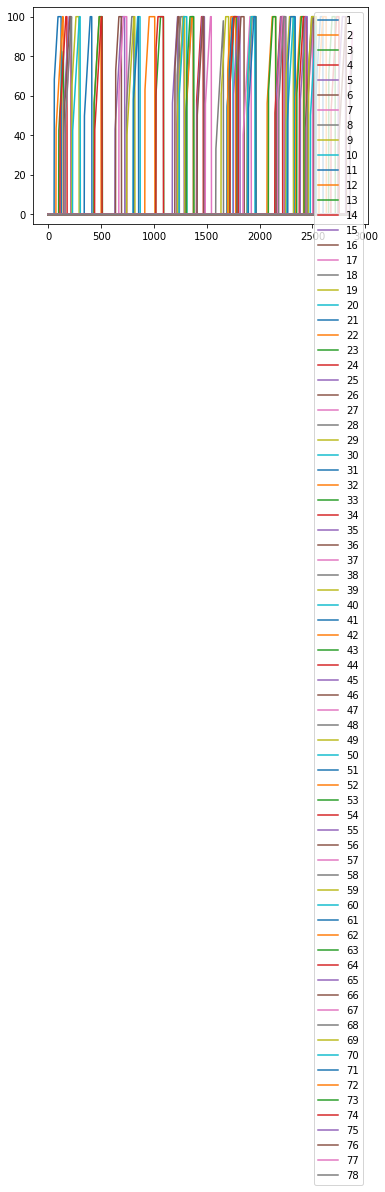

In [103]:
Avail_energy_table = Avail_energy_csv_data.iloc[:,2:]
#del Avail_energy_csv_data['Available_energy_sources']

Avail_energy_table.plot()

Storage profile

In [104]:

""" storage_profile = result.get_storage_profile(num_time_steps(start, end, res))
EV_storage_dataframe = pd.DataFrame(zip(create_time_steps(start, end, res), storage_profile))

EV_storage_dataframe.rename(columns={0: 'time', 1: 'storage'}, inplace=True) #kW
EV_storage_dataframe.set_index('time', inplace=True)

EV_storage_dataframe.plot() """

" storage_profile = result.get_storage_profile(num_time_steps(start, end, res))\nEV_storage_dataframe = pd.DataFrame(zip(create_time_steps(start, end, res), storage_profile))\n\nEV_storage_dataframe.rename(columns={0: 'time', 1: 'storage'}, inplace=True) #kW\nEV_storage_dataframe.set_index('time', inplace=True)\n\nEV_storage_dataframe.plot() "

In [105]:
""" EV_storage_profile_csv = EV_storage_dataframe.to_csv('generated_data/EV_storage_test.csv', index = True) """

" EV_storage_profile_csv = EV_storage_dataframe.to_csv('generated_data/EV_storage_test.csv', index = True) "

Charging time Histogram

#### Arrival distribution

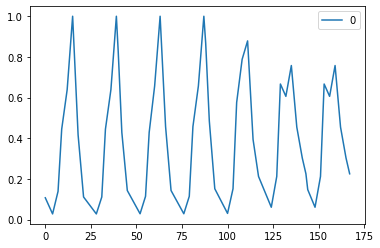

In [106]:
pd.DataFrame(yaml_str['arrival_distribution']).plot()

Max power in kW

In [107]:
result.max_load()

18.5

Max simultaneity

In [108]:
result.simultaneity_factor(infrastructure=realisation.infrastructure)

1.0

In [109]:
result.simultaneity_factor(infrastructure=realisation.infrastructure, bins=[0., 1e-20,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

[(996, 0.0),
 (12, 1e-20),
 (10, 0.1),
 (838, 0.2),
 (7, 0.3),
 (546, 0.4),
 (6, 0.5),
 (287, 0.6),
 (4, 0.7),
 (120, 0.8),
 (55, 0.9)]

Simultaneity factor over time

In [110]:
""" total_power = result.get_power_charging_points(config.infrastructure) #ye ye name refactor will come
sf = EV_load_dataframe/total_power
sf.plot() """

' total_power = result.get_power_charging_points(config.infrastructure) #ye ye name refactor will come\nsf = EV_load_dataframe/total_power\nsf.plot() '